<a href="https://colab.research.google.com/github/Flonsbob/Floris-van-Eisden---Exam---Applied-Statistics-and-Modeling/blob/main/Exam_assignment_Final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
#imporing everything at the very beginning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve
from	sklearn.model_selection	import cross_val_score
from math import log
from sklearn.impute import KNNImputer

In [213]:
#upload the data
from google.colab import files
files.upload()

Saving adrenal_tumour.csv to adrenal_tumour (2).csv


{'adrenal_tumour.csv': b'0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,status\n228.53,1554.8,237.34,51.33,72.0,56.17,984.06,93.83,149.27,261.54,166.44,63.8,220.78,1547.7,46.26,368.91,251.85,124.46,256.95,91.88,6.38,734.57,384.9,1084.0,264.41,5.92,360.39,2.27,153.04,61.81,173.95,16.68,CTL\n272.74,1506.8,581.43,113.7,440.65,60.05,1548.2,118.75,113.8,1025.5,1962.7,74.24,382.88,2781.2,43.66,778.75,879.3,169.63,223.12,93.53,24.12,957.95,448.07,2228.3,390.51,7.23,342.35,13.19,141.35,50.09,171.9,113.09,CTL\n264.82,1769.4,98.33,79.73,234.27,43.05,1309.4,155.1,65.93,725.83,268.07,124.63,174.45,4109.9,43.7,346.14,506.0,72.75,293.58,175.82,18.33,805.95,909.2,893.96,165.23,6.78,244.43,6.54,123.03,23.66,194.11,29.12,CTL\n103.07,609.4,169.51,162.96,297.85,2.51,501.28,38.3,28.95,358.07,89.14,40.21,89.41,544.52,0.0,260.15,188.49,88.37,336.91,32.25,60.3,1366.6,177.81,525.5,70.3,1.94,190.84,2.28,26.78,16.63,38.72,15.26,CTL\n100.04,1062.5,100.79,39.67,31.74,32.73,9

In [214]:
#create dataframe (df)
df = pd.read_csv('adrenal_tumour.csv')

In [ ]:
df.keys()
#tumor status is in column 32

In [ ]:
df.status
#values of the status column are a 3-character string object

In [ ]:
df.describe()
#the values are probably not normally distributed

In [ ]:
df.info()
#imputation is needed

In [219]:
#Makes a list out of the keys of the dataframe. This is needed for the for-loop that makes the histograms.
keys_list_df = df.keys() 

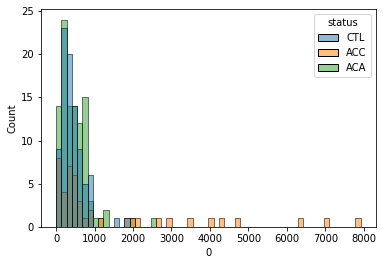

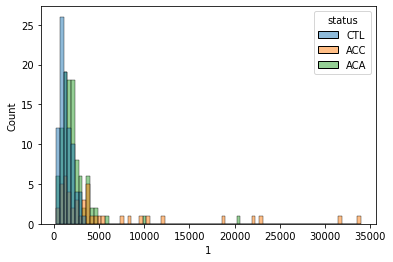

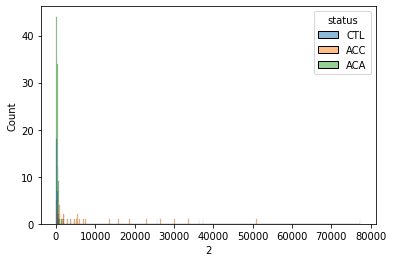

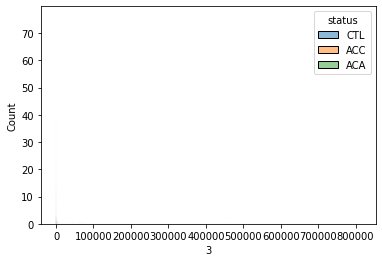

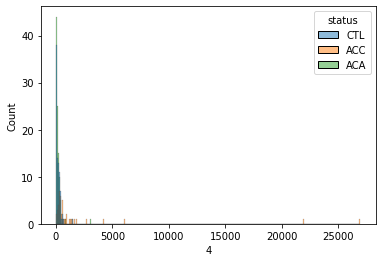

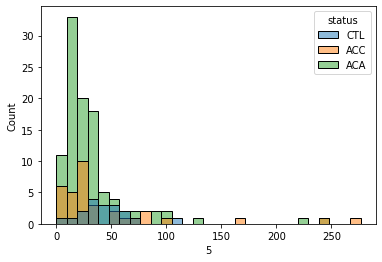

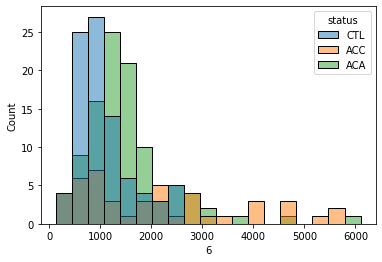

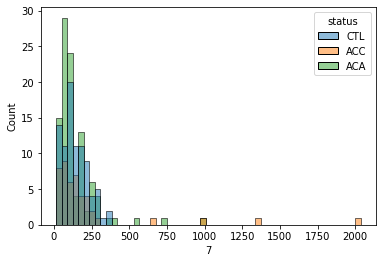

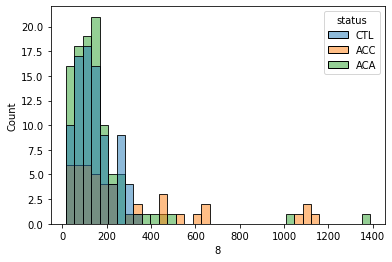

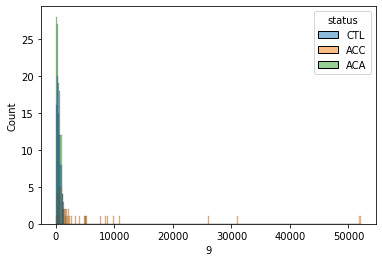

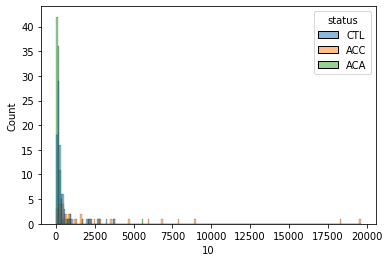

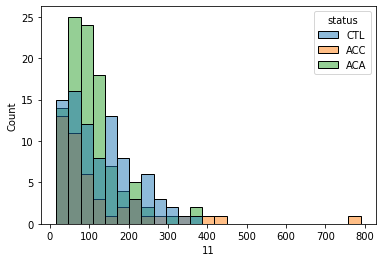

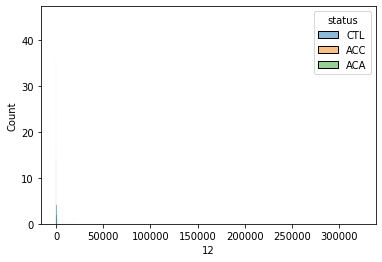

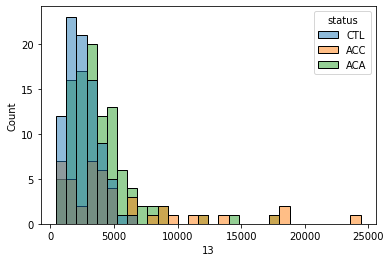

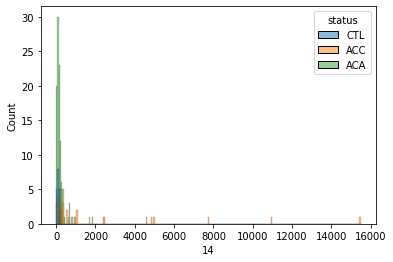

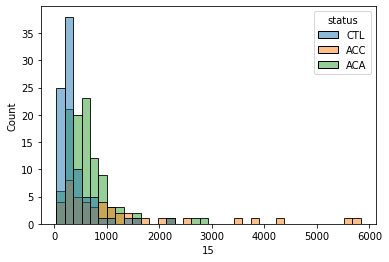

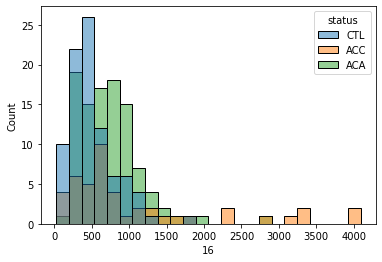

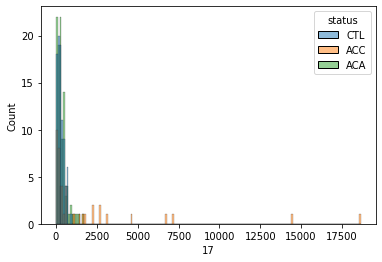

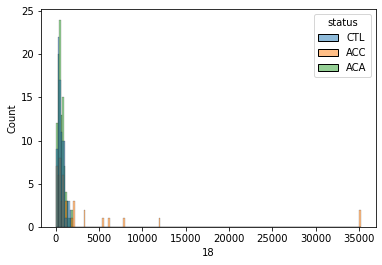

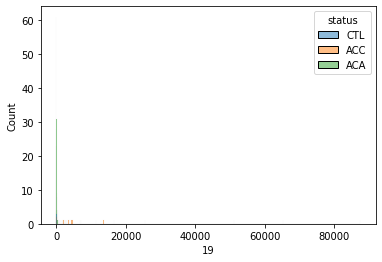

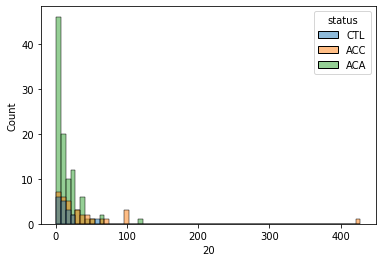

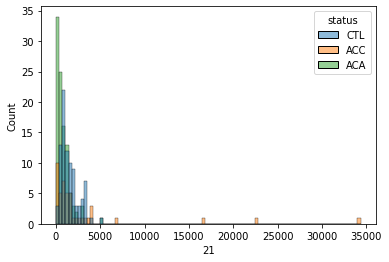

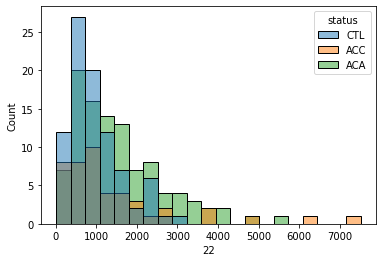

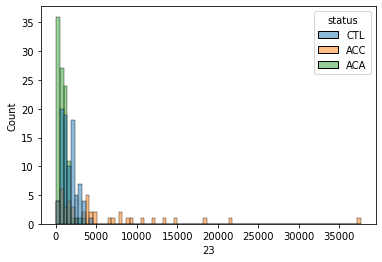

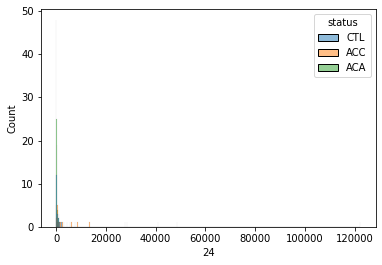

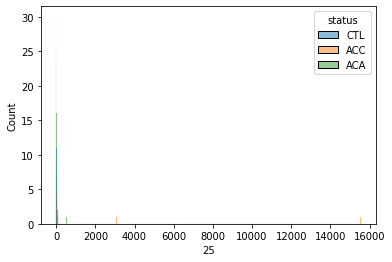

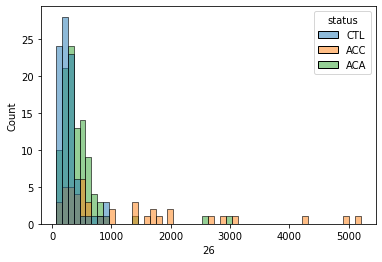

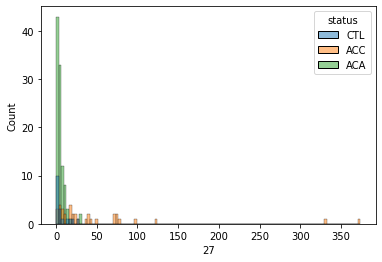

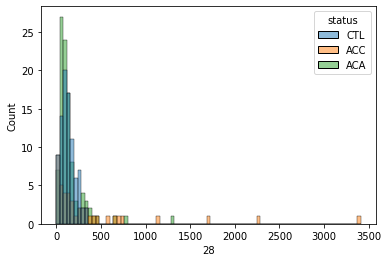

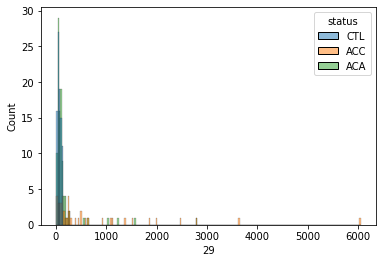

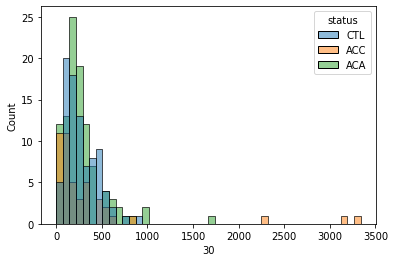

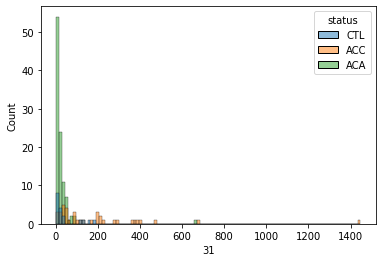

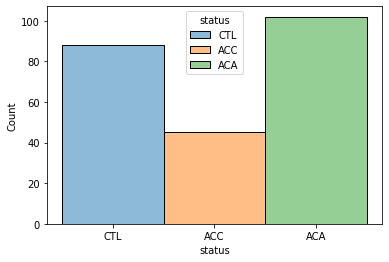

In [220]:
#For-loop that creates a histogram of the count of each column in the dataframe. The data is divided between the three groups: Control (CTL),  malignant carcinoma (ACC) and adrenocortical adenoma (ACA).
for col in keys_list_df:
  sns.histplot(data= df, x=df[col], hue=df['status'])
  plt.show()

In [221]:
#The data is not normally distributed, but does have some characteristics of a normal distribution

In [222]:
#Returns the natural logarithm of (the input + 1)
transformer = FunctionTransformer(np.log1p)

In [223]:
#Test to see that the transformer works
xxx = [10.0]
transformer.transform(xxx)

array([2.39789527])

In [224]:
#create a new dataframe (EXperimental_DataFrame) that is equal to df.
#remove control data from ex_df
ex_df = df.copy()

for index, row in ex_df.iterrows():
    """function that removes control data from ex_df"""
    if row['status'] == 'CTL':
        ex_df.drop(index, inplace=True)

In [ ]:
#Check to see that CTL was removed from ex_df
df['status']

In [ ]:
#Check to see that CTL was removed from ex_df
ex_df['status']

In [227]:
#creates y that is the status column of ex_df
y = ex_df['status'].copy()
#creates X that is qual to ex_df
X = ex_df
#Removes the status column from X but not from ex_df
X = X.drop(columns = 'status')

In [ ]:
#check to see that y is ex_df['status']
print(y)

In [ ]:
#status column is still in ex_df
ex_df.info()

In [ ]:
#status column is not in X anymore
X.info()

In [231]:
transformer.fit(X,y)

FunctionTransformer(func=<ufunc 'log1p'>)

In [232]:
#Results look as expected. 
zzz = transformer.transform(X)

In [ ]:
#I took the ln of some of these values to see if the above results of the transformer were acceptable.
X.describe()

In [234]:
#Define an imputer. Imputer uses median
imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [235]:
#Sets up a logistic regression model
model = LogisticRegression(penalty="l2", C=1, solver="saga", max_iter=10000)

In [236]:
#pipline that starts with the imputer then uses the logarithmic function transformer and then the model
#imp and model are defined just above, the transformer was defined and tested (but not used) earlier.
pipe = Pipeline([('imp', imp),
                 ('transformer', transformer),
                 ('model', model)])

In [237]:
pipe.fit(X,y)

Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model',
                 LogisticRegression(C=1, max_iter=10000, solver='saga'))])

In [ ]:
#C parameter of the model is called 'model_C' in the pipeline
pipe.get_params()

In [239]:
range_C_parameter = np.power(10, np.arange(-5,1,0.5))
train_scores, val_scores = validation_curve(pipe, X, y,
                                          param_name = 'model__C', 
                                          param_range = range_C_parameter, 
                                          cv = 5,
                                          scoring = "roc_auc")

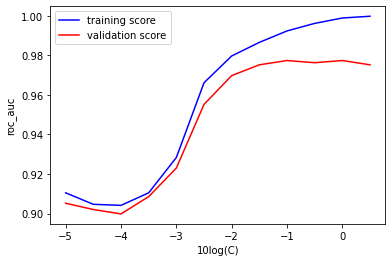

In [240]:
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean (train_scores, 1), color='blue', label='training score')
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean(val_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('10log(C)')
plt.ylabel("roc_auc");

In [241]:
def score_model(model,	X,	y):
		scores	=	cross_val_score(model,	X,	y,	cv=5,	scoring='roc_auc')
		print("%0.3f	AUC	with	a	standard	deviation	of	%0.3f" % (scores.mean(),	scores.std()))

In [242]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [243]:
model.set_params(C = 1)

LogisticRegression(C=1, max_iter=10000, solver='saga')

In [244]:
score_model(model, X, y)

nan	AUC	with	a	standard	deviation	of	nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/loc

In [245]:
imp2 = KNNImputer(n_neighbors=10)

In [246]:
pipe2 = Pipeline([('imp2', imp2),
                 ('transformer', transformer),
                 ('model', model)])